In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/architecture")
sys.path.insert(2, "../python/functions")

In [3]:
import numpy as np
from enkf_functions import enkf_linear_problem_analysis
from inverse_problem_functions import y_noise
from plotting_functions import plot_IP_loss_evolution, plot_IP_final_cosine_sim, plot_IP_convergence

# Linear Model

## Model:
$Ax=y$ with $A\in\mathbb{R}^{m\times n}$.

In [4]:
np.random.seed(42)
A = np.random.uniform(size = (1000, 100), low = 0, high = 1)
x = np.random.uniform(size = (A.shape[1], ))

In [5]:
def model_func(x):
    return A @ x

In [6]:
noise = False

y, std = y_noise(model_func,
                 x, 
                 noise)

In [7]:
setting_dict = {"A": A,
                "model_func": model_func,
                "x": x,
                "y": y,
                "particles": 50,
                "epochs": 200,
                "batch_size" : 200,
                "stepsize": 0.0002,
                "noise": noise,
                "std": std
                }
analysis_dict = {"disjoint_batch": True,
                 "batch_particle_connection": {"connect": False,
                                               "shuffle": "particle"},
                 "tikhonov": {"regularize": True,
                              "lambda": 1},
                 "variance_inflation": {"inflation": True,
                                        "alpha": 1}
                }

In [8]:
np.random.seed(42)
return_dict = enkf_linear_problem_analysis(setting_dict,
                                           analysis_dict)

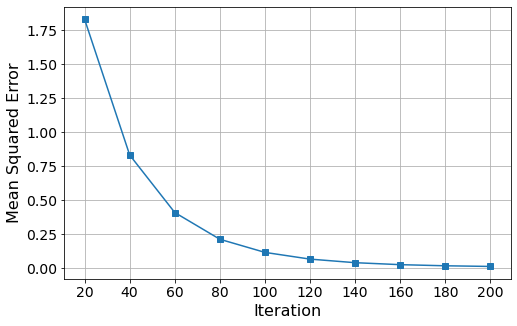

In [9]:
plot_IP_loss_evolution(return_dict,
                       start_iteration = 20,
                       reg_line = True,
                       tick_diff = 20,
                       marker = True,
                       at_tick = True,
                       xlabel = "Iteration",
                       save = None)

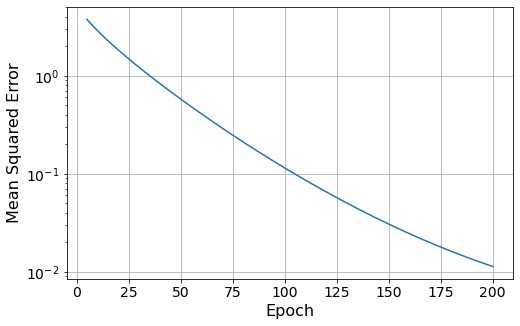

In [10]:
plot_IP_convergence(return_dict,
                    log = "semi_log",
                    xlabel = "Epoch",
                    save = None)

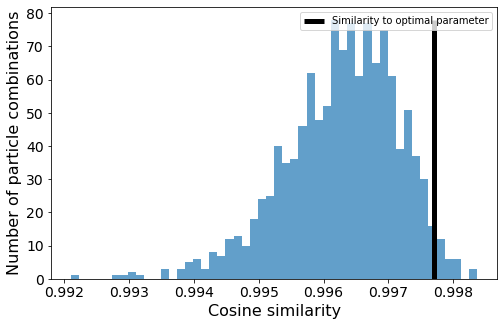

In [11]:
plot_IP_final_cosine_sim(return_dict,
                         bins = 50,
                         opt_comparison = True,
                         save = None)